# **Introduction**

Before watching a movie, one of the first things we often do is check the reviews. Whether it’s a blockbuster like Avengers or a new release, we tend to look at what others are saying—are the comments mostly positive or negative? These reviews give us a sense of the overall sentiment around the movie.

That’s where sentiment analysis comes in. It’s a method used to automatically understand the emotions and opinions in text, like movie reviews. This technique has many useful applications beyond just movies:

**Understanding What People Think**: Businesses can use sentiment analysis to find out what customers feel about their products or services. This helps in improving products, marketing, and customer support.

**Tracking Social Media Opinions**: Companies and organizations can analyze tweets and posts to see how people feel about their brand, a new product, or even competitors. It helps them stay in tune with public opinion.

**Improving Customer Service**: By spotting negative feedback quickly, businesses can respond and fix problems, making customers happier and more loyal.

**Analyzing Politics**: Sentiment analysis can help understand how people feel about political topics, leaders, or events, which can guide campaigns and decisions.

**Helping Investors**: In the financial world, it’s used to understand how people feel about certain stocks or the market in general. This emotional insight can support smarter investment choices.

In this project, we’ll work with a dataset of 50,000 movie reviews from IMDB, each labeled as positive or negative. Using this, we’ll explore how machine learning and deep learning models can learn to predict the sentiment of a movie review — just like how we judge a film based on online comments before deciding to watch it!

# **Data:**
The data has been sourced from Kaggle https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
The dataset contains 50,000 movie reviews from IMDb, each labeled with a sentiment — either positive or negative. It's balanced, meaning it includes 25,000 positive and 25,000 negative reviews.

**Training and Testing Split**
1. The dataset is already divided into:

- 25,000 reviews for training

- 25,000 reviews for testing

2. Each set contains an equal number of positive and negative examples:

    **Training data:**

    - 12,500 positive reviews

    - 12,500 negative reviews

    **Test data:**

    - 12,500 positive reviews

    - 12,500 negative reviews

This ensures that both the training and test datasets are balanced and suitable for binary classification tasks like sentiment analysis.

In [1]:
!pip install kaggle

### **Importing the Dependencies**

In [2]:
import os
import json

from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## **Data Collection- Kaggle API**

In [2]:
kaggle_dictionary = json.load(open("kaggle.json"))

FileNotFoundError: [Errno 2] No such file or directory: 'kaggle.json'

In [10]:
kaggle_dictionary.keys()

dict_keys(['username', 'key'])

In [11]:
# setup kaggle credentials as environment variables
os.environ["KAGGLE_USERNAME"] = kaggle_dictionary["username"]
os.environ["KAGGLE_KEY"] = kaggle_dictionary["key"]

In [12]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!ls

imdb-dataset-of-50k-movie-reviews.zip  kaggle.json  sample_data


In [13]:
# unzip the dataset file
with ZipFile("imdb-dataset-of-50k-movie-reviews.zip", "r") as zip_ref:
  zip_ref.extractall()

In [15]:
!ls

 drive		     imdb-dataset-of-50k-movie-reviews.zip   sample_data
'IMDB Dataset.csv'   kaggle.json


### **Loading the Dataset**

In [5]:
#data = pd.read_csv("/content/IMDB Dataset.csv")
import pandas as pd
data = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [4]:
# Shape of the dataset
data.shape

(50000, 2)

In [6]:
# First 5 rows of the dataset
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
# Top 5 rows of the dataset
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [7]:
#Sentiment Class Distribution
data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

### **Bar Plot for Sentiment Class Distribution**

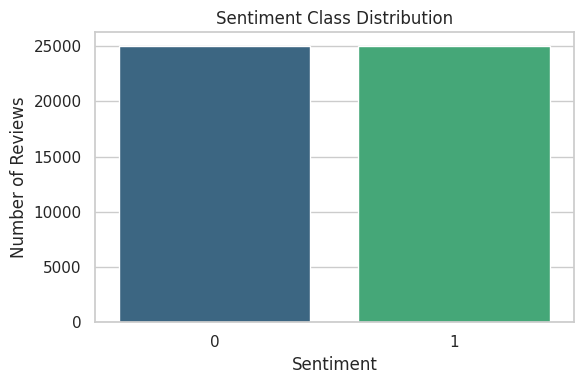

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Count the values
sentiment_counts = data["sentiment"].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Add title and labels
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

# Show the plot
plt.tight_layout()
plt.show()


In [8]:
# Converting Sentiment Labels from Text to Numbers
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

/tmp/ipykernel_35/2568826810.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


In [9]:
# Top 5 rows after conversion
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [10]:
# Sentiment Class Distribution after conversion
data["sentiment"].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [9]:
# split data into training data and test data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [13]:
print(train_data.shape)
print(test_data.shape)

(40000, 2)
(10000, 2)


### **Numbers of words in the text**

In [30]:
import pandas as pd

# Add word count column to Reviews in Training set
train_data['word_count'] = train_data['review'].apply(lambda x: len(str(x).split()))

In [31]:
# First Few Reviews and Their Word Counts
train_data[['review', 'word_count']].head()

,review,word_count
39087,That's what I kept asking myself during the ma...,400
30893,I did not watch the entire movie. I could not ...,283
45278,A touching love story reminiscent of In the M...,93
16398,This latter-day Fulci schlocker is a totally a...,174
13653,"First of all, I firmly believe that Norwegian ...",306


In [15]:
# Summary Statistics of Word Count in Training Data
train_data['word_count'].describe()

count    40000.000000
mean       231.006425
std        171.612227
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: word_count, dtype: float64

## **Distribution of Number of Words**


<Axes: >

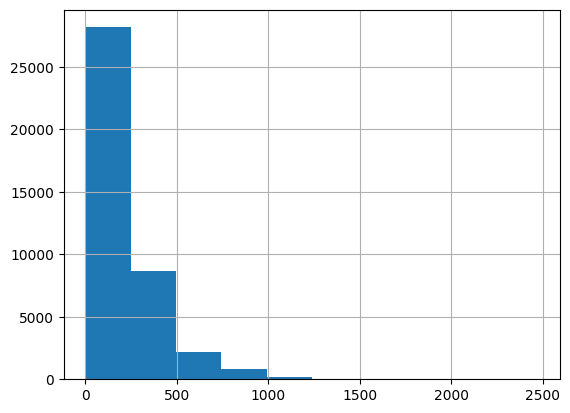

In [16]:
train_data['word_count'].hist()

## **Distribution of Positive and Negative by the Number of Words**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


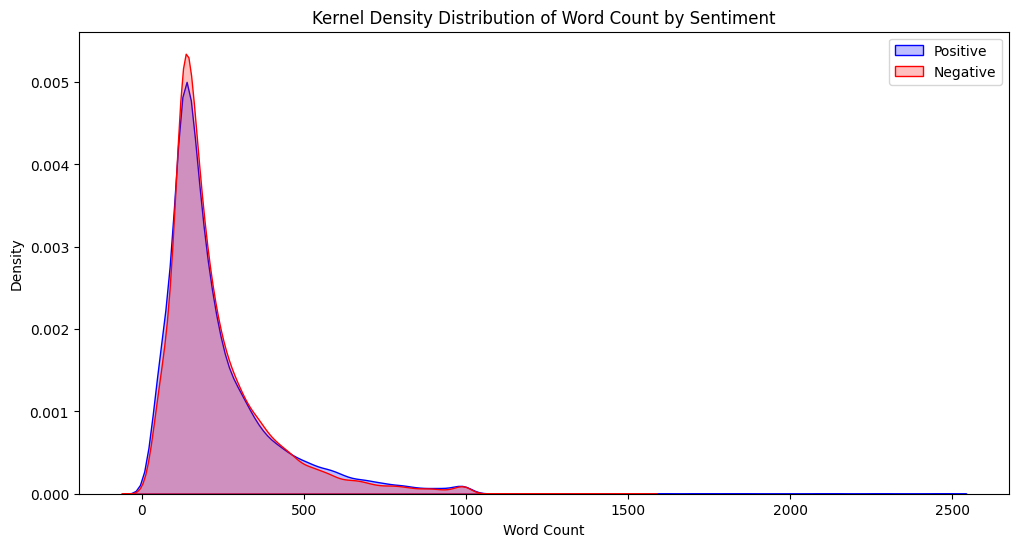

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# KDE plot for positive sentiment
sns.kdeplot(
    train_data[train_data['sentiment'] == 1]['word_count'],
    fill=True, color="b", label="Positive"
)

# KDE plot for negative sentiment
sns.kdeplot(
    train_data[train_data['sentiment'] == 0]['word_count'],
    fill=True, color="r", label="Negative"
)

plt.title('Kernel Density Distribution of Word Count by Sentiment')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()
plt.show()


## **Word Cloud for Positive and Negative Reviews Separately**

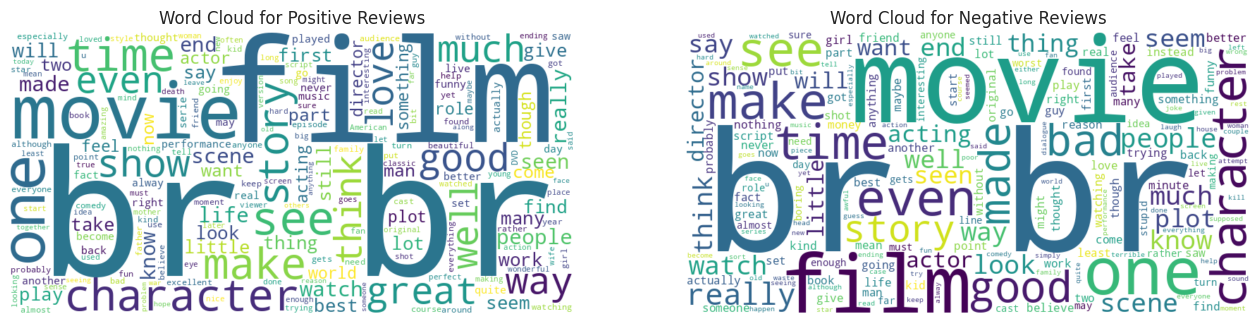

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate positive and negative reviews
positive_reviews = ' '.join(train_data[train_data['sentiment'] == 1]['review'])
negative_reviews = ' '.join(train_data[train_data['sentiment'] == 0]['review'])

# Generate word clouds
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.show()


## **Boxplot of Review Length by Sentiment**

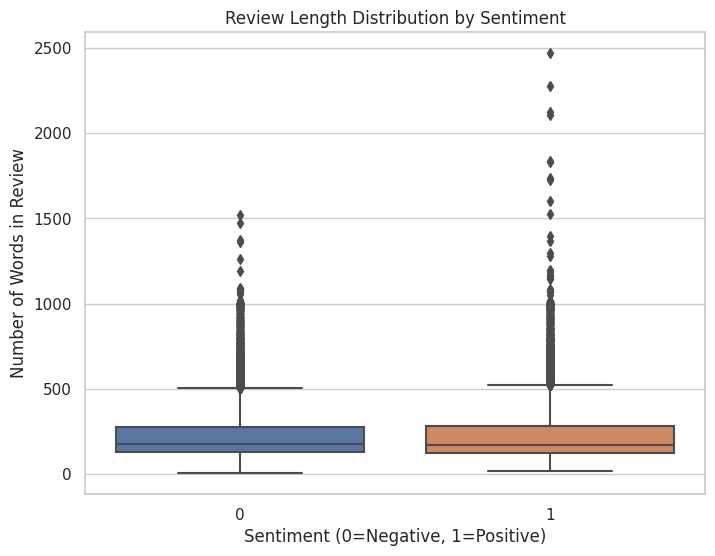

In [33]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='word_count', data=train_data)
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Sentiment (0=Negative, 1=Positive)')
plt.ylabel('Number of Words in Review')
plt.show()

## **Top 20 Most Frequent Words (Overall)**

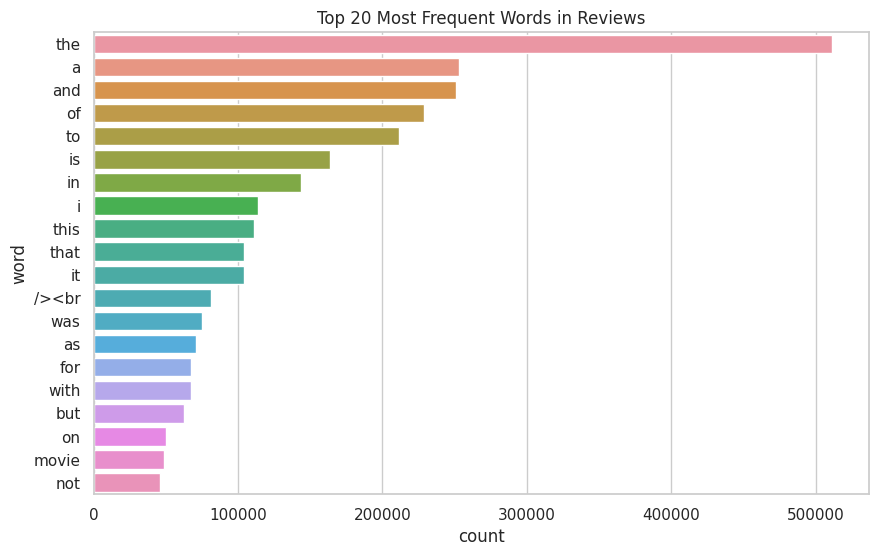

In [34]:
from collections import Counter
import pandas as pd

# Tokenize all reviews and count words
all_words = ' '.join(train_data['review']).lower().split()
word_counts = Counter(all_words)

# Convert to DataFrame for plotting
common_words = pd.DataFrame(word_counts.most_common(20), columns=['word', 'count'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=common_words, x='count', y='word')
plt.title('Top 20 Most Frequent Words in Reviews')
plt.show()


## **Heatmap: Review Length vs Sentiment**

Review Length vs Sentiment is a visualization that helps to see the relationship between how long a review is (measured by the number of words) and its sentiment (positive or negative).

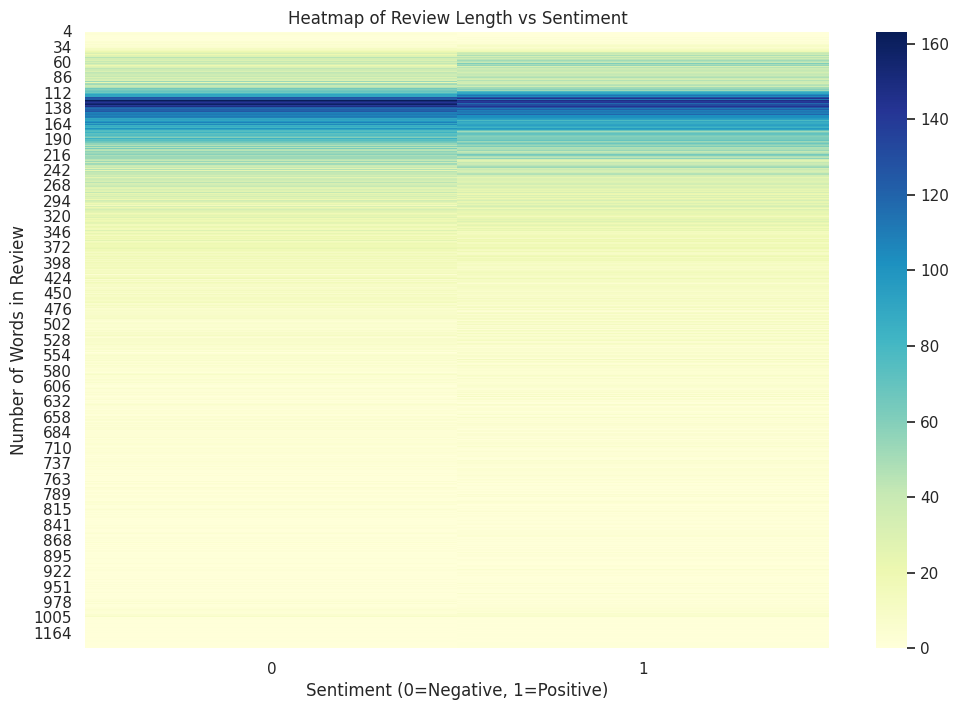

In [35]:
# Create pivot table
pivot = train_data.pivot_table(index='word_count', columns='sentiment', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='YlGnBu', cbar=True)
plt.title('Heatmap of Review Length vs Sentiment')
plt.xlabel('Sentiment (0=Negative, 1=Positive)')
plt.ylabel('Number of Words in Review')
plt.show()


## **Data Cleaning**
 - Lowercasing

- Removing square bracketed text

- Removing URLs

- Removing HTML tags

- Removing punctuation

- Removing newlines (converting to space)

- Removing words with digits

- Removing extra spaces

- Removing stopwords

In [12]:
import re
import string
import nltk
from nltk.corpus import stopwords

# 1. Download stopwords (do this once)
nltk.download('stopwords')

# 2. Get stopword list
stop_words = set(stopwords.words('english'))

# 3. Define clean_text function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# 4. Apply to your review data BEFORE tokenization
data['clean_review'] = data['review'].apply(clean_text)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Word Cloud of Cleaned Reviews**
- Shows the most frequent words in the cleaned reviews visually.

- Helps quickly see which words dominate after cleaning and stopword removal.

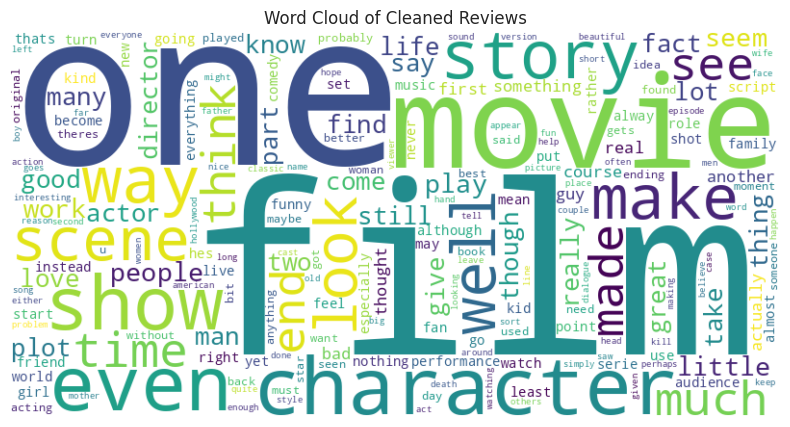

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(data['clean_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Cleaned Reviews")
plt.show()


## **Distribution of Review Lengths (Words) After Cleaning**
- Compare with original length distribution to see how cleaning affects text length.

- Useful to know if the cleaning is overly aggressive or balanced.

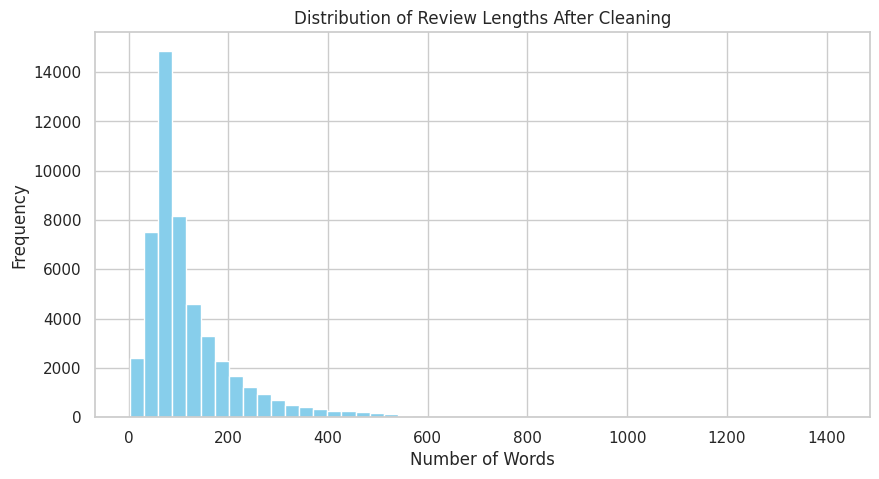

In [38]:
data['clean_word_count'] = data['clean_review'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 5))
plt.hist(data['clean_word_count'], bins=50, color='skyblue')
plt.title("Distribution of Review Lengths After Cleaning")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


## **Top N Most Frequent Words**
- A bar plot showing the most common words post-cleaning.

- Good to confirm that stopwords and noise are removed.

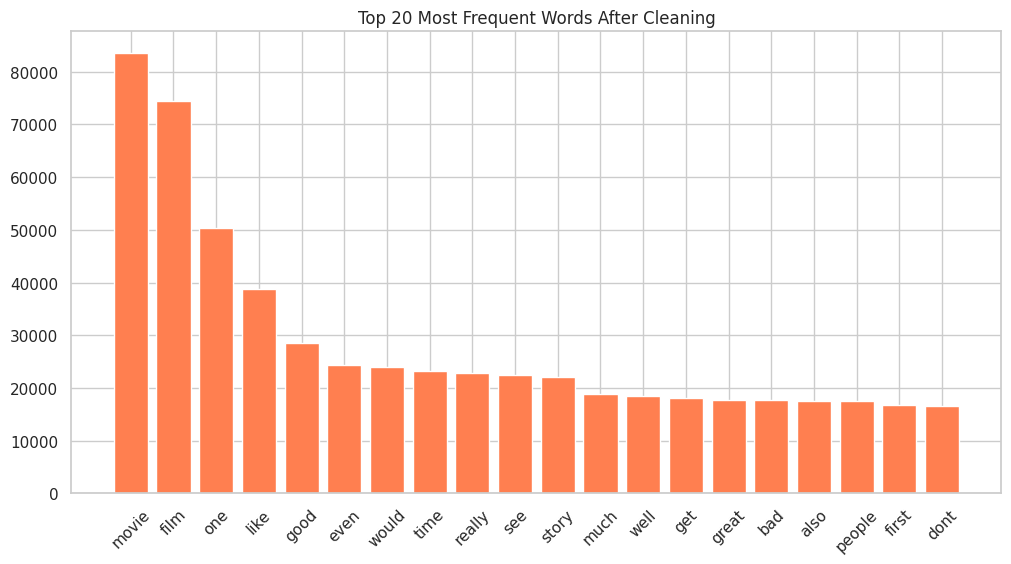

In [39]:
from collections import Counter

words = ' '.join(data['clean_review']).split()
word_freq = Counter(words)
common_words = word_freq.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(12,6))
plt.bar(words, counts, color='coral')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words After Cleaning")
plt.show()


## **Data Preprocessing**

**Tokenization**: Converting text into sequences of integers, where each integer represents a word from the vocabulary.

**Padding**: Ensuring that all sequences have the same length (here, maxlen=200) by adding zeros at the beginning or end of shorter sequences.

This prepares the raw text data to be fed into the models we use in this project

In [13]:
# Tokenize text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [20]:
print(X_train)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]


In [21]:
print(X_test)

[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [14]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [23]:
print(Y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


## **Model 1 LSTM**

Long Short-Term Memory (LSTM) networks are a special type of Recurrent Neural Network (RNN) designed to learn and remember long-term dependencies in sequence data. Unlike traditional RNNs, LSTMs can effectively capture information over longer sequences, which makes them very popular for natural language processing tasks like sentiment analysis, speech recognition, and time series forecasting.

LSTM achieves this by using a memory cell and gates (input, forget, and output gates) that control the flow of information, allowing the model to decide what to remember and what to forget over time.

Below LSTM model is a simple yet powerful LSTM-based neural network designed for binary sentiment classification of movie reviews.

- **Embedding Layer**: Converts each word (from a vocabulary of 5000) into a 128-dimensional dense vector. This helps the model learn word representations.

- **LSTM Layer**: Processes the sequences of word embeddings with 128 units and applies dropout to prevent overfitting. It captures the contextual information from the sequence of words.

- **Dense Output Layer**: A single neuron with sigmoid activation, providing a probability score to classify the review as positive or negative.

We compile the model using the Adam optimizer and binary cross-entropy loss, suitable for binary classification. Training is done for 5 epochs with a batch size of 64, and 20% of the training data is used for validation to monitor the model's performance.

In [40]:
# build the model

model = Sequential()
model.add(Embedding(input_dim=5000, ouput_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [41]:
model.build(input_shape=(None, 200))  # batch size None, sequence length 200
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 200, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [61]:
# Training the Model
model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 198s 383ms/step - accuracy: 0.7194 - loss: 0.5320 - val_accuracy: 0.8385 - val_loss: 0.3727
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 198s 382ms/step - accuracy: 0.8549 - loss: 0.3507 - val_accuracy: 0.8389 - val_loss: 0.3806
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 199s 377ms/step - accuracy: 0.8716 - loss: 0.3091 - val_accuracy: 0.8626 - val_loss: 0.3289
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 190s 379ms/step - accuracy: 0.8920 - loss: 0.2695 - val_accuracy: 0.8661 - val_loss: 0.3451
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 195s 366ms/step - accuracy: 0.9080 - loss: 0.2367 - val_accuracy: 0.8771 - val_loss: 0.3103


### **Metrics for the Model**

In [69]:
#Classification Report
target_names = ['negative', 'positive']

print(classification_report(true_labels, predicted_labels, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.50      1.00      0.66      4961
    positive       0.00      0.00      0.00      5039

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [70]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(true_labels, predicted_labels)
print(conf_matrix)

[[4961    0]
 [5039    0]]


In [ ]:
# Model Evaluation
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 [==============================] - 20s 63ms/step - loss: 0.3139 - accuracy: 0.8830
Test Loss: 0.313868910074234
Test Accuracy: 0.8830000162124634


The test accuracy (~88%) seems misleading because the model is predicting a single class (negative) and still getting high accuracy due to class imbalance or dataset distribution.

Accuracy alone is not a good metric here. The model is not performing useful classification.

**Conclusion on Model 1 - LSTM** : The model is training well on loss and accuracy but is failing to discriminate between classes in practice. The core issue is that it predicts only one class, making the accuracy metric misleading.

## **Model 2 - Bidirectional LSTM**

A Bidirectional LSTM (BiLSTM) is an advanced type of Recurrent Neural Network (RNN) designed for sequence data such as text. Unlike a standard LSTM that reads the input sequence in one direction (usually forward), a Bidirectional LSTM processes the sequence in both directions — forward and backward.

This allows the model to have information from the past and the future at every point in the sequence, making it more powerful for understanding context in tasks like sentiment analysis, speech recognition, and language modeling.

The reason for bidirectional is some words or phrases depend on both previous and next words to be properly understood.

For example, in the sentence "I didn’t like the movie, but the ending was good," the sentiment depends on the entire context, not just the words from left to right.

This Bidirectional LSTM model is a strong choice for sentiment analysis because it considers the full context of text sequences from both directions and incorporates regularization and normalization to improve training and generalization.

In [ ]:
#Build the model 

model = Sequential([
    Embedding(12000, 100, input_length=200),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [107]:
#Reshape the labels & Convert to float32

import numpy as np

Y_train = np.array(Y_train).reshape(-1, 1).astype('float32')
Y_test = np.array(Y_test).reshape(-1, 1).astype('float32')

In [109]:
# Training the model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, Y_test),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 432s 691ms/step - accuracy: 0.8541 - loss: 0.3421 - val_accuracy: 0.8459 - val_loss: 0.3468 - learning_rate: 0.0010
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 444s 695ms/step - accuracy: 0.8845 - loss: 0.2817 - val_accuracy: 0.8688 - val_loss: 0.3027 - learning_rate: 0.0010
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 429s 674ms/step - accuracy: 0.8964 - loss: 0.2567 - val_accuracy: 0.8690 - val_loss: 0.3097 - learning_rate: 0.0010
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 430s 688ms/step - accuracy: 0.9139 - loss: 0.2197 - val_accuracy: 0.8843 - val_loss: 0.3024 - learning_rate: 0.0010
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 443s 689ms/step - accuracy: 0.9132 - loss: 0.2182 - val_accuracy: 0.8934 - val_loss: 0.2659 - learning_rate: 0.0010
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 452s 706ms/step - accuracy: 0.9321 - loss: 0.1741 - val_accuracy: 0.8972 - val_loss: 0.2771 - learning_rate: 0.0010
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 430s 686ms/step - accura

In [112]:
# Get new predictions
predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype('int').flatten()
true_labels = Y_test.flatten().astype('int')

from sklearn.metrics import classification_report, confusion_matrix

# Evaluate
target_names = ['negative', 'positive']
print(classification_report(true_labels, predicted_labels, target_names=target_names))
print("Confusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))


313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 214ms/step
              precision    recall  f1-score   support

    negative       0.89      0.90      0.89      4961
    positive       0.90      0.89      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
[[4454  507]
 [ 559 4480]]


In [113]:
# Model Evaluation
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 212ms/step - accuracy: 0.8917 - loss: 0.2692
Test Loss: 0.2658678889274597
Test Accuracy: 0.8934000134468079


**Model 2 Summary**

- Test accuracy of ~89.3% and test loss around 0.27 is a solid result for sentiment classification on this dataset.
- This performance is a significant improvement over simpler models like a basic LSTM or feedforward network.
- This Bidirectional LSTM model is performing well, with good balance between training and validation accuracy, and solid precision/recall scores.
- It’s a strong baseline for sentiment analysis!

## **Model 3 - Bidirectional GRU**

A Bidirectional GRU (Gated Recurrent Unit) is a type of recurrent neural network (RNN) architecture that processes sequential data in both forward and backward directions. This means it reads the text from start to end and also from end to start, capturing context from both past and future words. GRUs are similar to LSTMs but have a simpler structure, making them faster to train while still being effective at learning long-range dependencies in text.

Bidirectional GRUs are especially useful in natural language processing tasks like sentiment analysis because understanding both the previous and next words helps the model better understand the sentiment expressed in a sentence

### **GRU**
GRU consists of two gates. Update gate and Reset gate

 **Update gate:**
A combination of the input and forget gates, it decides how much of the past information needs to be passed along to the future.

 **Reset gate:**
Determines how much of the past information to forget.

 **Memory Cell:**
Unlike LSTMs, GRUs do not have a separate memory cell. They use the hidden state to transfer information. This can make them less effective than LSTMs at capturing long-term dependencies in some cases.

 **Parameter Count:**
GRUs have fewer parameters due to their simpler structure, making them faster to train than LSTMs. This can be particularly advantageous in scenarios where computational resources are limited or when working with smaller datasets.

 **Performance:**
GRUs perform comparably to LSTMs on many tasks, especially those that do not require modeling very long-term dependencies.

In [25]:
#Model build & train
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Embedding(12000, 100, input_length=20),
    SpatialDropout1D(0.2),
    Bidirectional(GRU(128, dropout=0.2, recurrent_dropout=0.2)),
    Dense(1, activation='sigmoid')  
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

model.fit(
    X_train, Y_train,
    epochs=10,
    validation_data=(X_test, Y_test),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 646s 507ms/step - accuracy: 0.7301 - loss: 0.5165 - val_accuracy: 0.8861 - val_loss: 0.2844 - learning_rate: 0.0010
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 628s 502ms/step - accuracy: 0.8901 - loss: 0.2704 - val_accuracy: 0.9048 - val_loss: 0.2341 - learning_rate: 0.0010
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 631s 505ms/step - accuracy: 0.9230 - loss: 0.2012 - val_accuracy: 0.8861 - val_loss: 0.2665 - learning_rate: 0.0010
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 624s 499ms/step - accuracy: 0.9372 - loss: 0.1658 - val_accuracy: 0.9017 - val_loss: 0.2491 - learning_rate: 0.0010
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 623s 499ms/step - accuracy: 0.9562 - loss: 0.1252 - val_accuracy: 0.8998 - val_loss: 0.2703 - learning_rate: 5.0000e-04


### **Metrics for the model**

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get predicted probabilities
predictions = model.predict(X_test)

# Convert probabilities to binary labels
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Ensure true labels are in the right format (convert Series to NumPy array)
true_labels = np.array(Y_test)

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
target_names = ['negative', 'positive']
print("\nClassification Report:")
report = classification_report(true_labels, predicted_labels, target_names=target_names)
print(report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 147ms/step
Confusion Matrix:
[[4345  616]
 [ 336 4703]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.93      0.88      0.90      4961
    positive       0.88      0.93      0.91      5039

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [28]:
#Model Evaluation
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 147ms/step - accuracy: 0.9036 - loss: 0.2347
Test Loss: 0.2340511977672577
Test Accuracy: 0.9047999978065491


**Model 3 Summary** :

- Test accuracy is approximately 90.5%, which is a strong result for sentiment analysis on this dataset.
- Test loss is low (0.234), which aligns well with the accuracy metrics.
- The model shows excellent learning and generalization capability.
- High accuracy and balanced precision/recall show the model handles both classes well.
- Some minor fluctuations in validation loss and slightly higher false positives, but overall the performance is strong.

## Save the model and tokenizer

In [29]:
model.save('GRU.h5')

In [30]:
import json

# Convert the tokenizer to JSON
tokenizer_json = tokenizer.to_json()

# Save to file
with open("tokenizer.json", "w") as f:
    f.write(tokenizer_json)


## **Model 4 : Hyperparameter Tuning of Bidrectional GRU**

Hyperparameter tuning is an important step in building better machine learning models. It involves adjusting key model parameters—such as the number of units in layers, dropout rates, embedding size, and optimizer choice—to improve performance, avoid overfitting, and achieve better generalization on unseen data.

In this model, we tune several hyperparameters of the Bidirectional GRU model based on insights from previous experiments:

- Embedding dimension is increased from 100 to 128 to capture richer word representations.

- Dropout rates are slightly increased to 0.3 in both the spatial dropout and GRU layers to reduce overfitting.

- Number of GRU units is reduced from 128 to 64 to simplify the model and potentially reduce training time.

- The optimizer is changed from Adam to RMSprop, which sometimes helps in stabilizing training and improving convergence for recurrent networks.

- Additionally, label encoding is applied to convert string labels into numeric format suitable for model training.

- This fine-tuned model aims to balance complexity and regularization to improve sentiment classification accuracy and robustness.

In [16]:
print(type(X_train), X_train.dtype)
print(type(Y_train), Y_train.dtype)

<class 'numpy.ndarray'> int32
<class 'pandas.core.series.Series'> object


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Embedding(12000, 128, input_length=20),  # Changed embedding dim to 128
    SpatialDropout1D(0.3),                   # Slightly increased dropout
    Bidirectional(GRU(64, dropout=0.3, recurrent_dropout=0.3)),  # Reduced units to 64
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])  # Changed optimizer

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

In [17]:
# Model training
model.fit(
    X_train, Y_train,
    epochs=10,
    validation_data=(X_test, Y_test),
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 778s 612ms/step - accuracy: 0.6767 - loss: 0.5753 - val_accuracy: 0.8436 - val_loss: 0.3719 - learning_rate: 0.0010
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 754s 603ms/step - accuracy: 0.8349 - loss: 0.3877 - val_accuracy: 0.8806 - val_loss: 0.3016 - learning_rate: 0.0010
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 752s 601ms/step - accuracy: 0.8747 - loss: 0.3089 - val_accuracy: 0.8945 - val_loss: 0.2628 - learning_rate: 0.0010
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 748s 599ms/step - accuracy: 0.8980 - loss: 0.2533 - val_accuracy: 0.9057 - val_loss: 0.2358 - learning_rate: 0.0010
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 750s 600ms/step - accuracy: 0.9108 - loss: 0.2273 - val_accuracy: 0.9102 - val_loss: 0.2221 - learning_rate: 0.0010
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 759s 607ms/step - accuracy: 0.9220 - loss: 0.2032 - val_accuracy: 0.9112 - val_loss: 0.2211 - learning_rate: 0.0010
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 747s 597ms

In [18]:
# Metrics for the tuned model
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get predicted probabilities
predictions = model.predict(X_test)

# Convert probabilities to binary labels
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Ensure true labels are in the right format (convert Series to NumPy array)
true_labels = np.array(Y_test)

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
target_names = ['negative', 'positive']
print("\nClassification Report:")
report = classification_report(true_labels, predicted_labels, target_names=target_names)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 175ms/step
Confusion Matrix:
[[4461  500]
 [ 388 4651]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.92      0.90      0.91      4961
    positive       0.90      0.92      0.91      5039

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [19]:
#Model Evaluation
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 170ms/step - accuracy: 0.9088 - loss: 0.2207
Test Loss: 0.22109338641166687
Test Accuracy: 0.9111999869346619


In [24]:
from tensorflow.keras.models import load_model

# Save the trained model
#model.save("best_gru_model.h5")
model.save("GRU.h5")

### **Summary of tuned bidirectional GRU**:
- This model is well-balanced, stable training and good generalization to test data, achieving an impressive 91% accuracy with strong precision and recall for both sentiment classes. 
- The hyperparameter tuning has clearly improved performance compared to earlier models, showing that careful adjustment of model architecture and training parameters can yield tangible benefits.

## **Building a Predictive System**

In [25]:
def predict_sentiment(review):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [26]:
# example usage 1
new_review = "This movie was fantastic. I loved it."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
The sentiment of the review is: positive


In [27]:
# example usage 2
new_review = "This movie was not that good"
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
The sentiment of the review is: negative


In [28]:
# example usage 3
new_review = "This movie was ok but not that good."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
The sentiment of the review is: negative


# **Conclusion**

We used Kaggle data to understand how LSTM/GRU can be used to predict sentiment of the data.

Hyper parameter tuned Bidirectional GRU gives

- Best balance between performance and generalization

- Robust precision and recall

- Better regularization and efficient training behavior


## **Model Comparison Summary**

| **Model**                              | **Architecture**                                           | **Validation Accuracy** | **Test Accuracy** | **F1 Score (Avg)**                         | **Loss Trend**           | **Remarks**                                             |
| -------------------------------------- | ---------------------------------------------------------- | ----------------------- | ----------------- | ------------------------------------------ | ------------------------ | ------------------------------------------------------- |
| **Model 1**<br>LSTM                    | `Embedding → LSTM → Dense`                                 | 87.7%                   | 88.3%             |  *Highly imbalanced (0.00 for one class)* | Steady                | Overfits on one class; not usable                       |
| **Model 2**<br>Bidirectional LSTM      | `Embedding → BiLSTM → BatchNorm → Dense`                   | 89.7%                   | 89.3%             | 0.89                                       | Plateau after epoch 6 | Good generalization, improved over Model 1              |
| **Model 3**<br>Bidirectional GRU       | `Embedding → BiGRU → Dense`                                | 90.4%                   | 90.5%             | 0.90                                       | Stable                | Strong performer, faster and more efficient than LSTM   |
| **Model 4**<br>Tuned Bidirectional GRU | `Embedding(128) → SpatialDropout(0.3) → BiGRU(64) → Dense` | **91.1%**               | **91.1%**         | **0.91**                                   | Smooth + stable       |  **Best model overall** – well-tuned, balanced, robust |


# **Future work:**

- Focal Loss (if some imbalance remains)

- Ensemble of GRU + LSTM

- Transformer-based models (like BERT) for even better performance (at higher cost)

# **References**

- LSTM and GRU Fundamentals

https://direct.mit.edu/neco/article-abstract/9/8/1735/6109/Long-Short-Term-Memory?redirectedFrom=fulltext

https://arxiv.org/abs/1406.1078

- Keras Documentation

https://keras.io/api/

- Model Evaluation Metrics

https://doi.org/10.48550/arXiv.2010.16061

- Optimizers and Learning Rate Scheduling

https://arxiv.org/abs/1412.6980

- Hyper parameters tuning of LSTM & GRU

https://arxiv.org/abs/1509.09292

https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

https://github.com/hyperopt/hyperopt